# Post-proc simulation results

Load hdf files, prepare them for post-processing.

Outputs from simulations (hdf files) provide modal displacements values. A conversion to "real" displacements
is required.


In [18]:
# Reload automatically all python modules before each cell exec
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# standard python packages
import sys
import time
import os
from model_tools import load_model, load_convert_and_save
# visu
import matplotlib.pyplot as plt
import scipy.io
import h5py
from simulation_campaigns import transfer_data
%matplotlib inline
import numpy as np

## Get list of remote files
and transfer if required

* Creates remote_data dictionnary which contains list of files to post-process
* Creates transfer.sh file to be executed to transfer (scp) files (h5) from remote server 


In [20]:
import pickle
import subprocess
#pkl_file = open('campaign_new_0612.pkl', 'rb')
pkl_file = open('campaign_1812.pkl', 'rb')
remote_data = pickle.load(pkl_file)
transfer_data(remote_data)
# execute file transfer.sh to get h5 files


In [21]:
remote_data

{'bass0.0': {'1003520': ['3966438',
   '636.0956120000001',
   '42',
   '0.0',
   'F_1003520_id_3966438/bass_e0.0_862_1003520.h5',
   'F_1003520_id_3966438/converted_bass_e0.0_862_1003520.h5'],
  '125440': ['3966435',
   '69.89253199999999',
   '42',
   '0.0',
   'F_125440_id_3966435/bass_e0.0_862_125440.h5',
   'F_125440_id_3966435/converted_bass_e0.0_862_125440.h5'],
  '128450560': ['3966445',
   '74312.935724',
   '42',
   '0.0',
   'F_128450560_id_3966445/bass_e0.0_862_128450560.h5',
   'F_128450560_id_3966445/converted_bass_e0.0_862_128450560.h5'],
  '15680': ['3966432',
   '2.894379',
   '42',
   '0.0',
   'F_15680_id_3966432/bass_e0.0_862_15680.h5',
   'F_15680_id_3966432/converted_bass_e0.0_862_15680.h5'],
  '16056320': ['3966442',
   '12216.658944',
   '42',
   '0.0',
   'F_16056320_id_3966442/bass_e0.0_862_16056320.h5',
   'F_16056320_id_3966442/converted_bass_e0.0_862_16056320.h5'],
  '2007040': ['3966439',
   '1356.6261020000002',
   '42',
   '0.0',
   'F_2007040_id_3966439

## Create 'converted' files

In [22]:
# List available campaigns
for name in remote_data:
    print(name)

one_contact0.5
results_paths
one_contact0.0
one_contact1.0
bass0.0
bass0.9
bass1.0
fretless0.0
fretless0.9
fretless1.0


Load model from file ./results_bass_1812/F_31360_id_3966433/bass_e0.0_862_31360.h5
Write new 'converted' file ./results_bass_1812/F_31360_id_3966433/converted_bass_e0.0_862_31360.h5
Load model from file ./results_bass_1812/F_1003520_id_3966438/bass_e0.0_862_1003520.h5
Write new 'converted' file ./results_bass_1812/F_1003520_id_3966438/converted_bass_e0.0_862_1003520.h5
Load model from file ./results_bass_1812/F_62720_id_3966434/bass_e0.0_862_62720.h5
Write new 'converted' file ./results_bass_1812/F_62720_id_3966434/converted_bass_e0.0_862_62720.h5
Load model from file ./results_bass_1812/F_250880_id_3966436/bass_e0.0_862_250880.h5
Write new 'converted' file ./results_bass_1812/F_250880_id_3966436/converted_bass_e0.0_862_250880.h5
Load model from file ./results_bass_1812/F_125440_id_3966435/bass_e0.0_862_125440.h5
Write new 'converted' file ./results_bass_1812/F_125440_id_3966435/converted_bass_e0.0_862_125440.h5
Load model from file ./results_bass_1812/F_501760_id_3966437/bass_e0.0_862

Write new 'converted' file ./results_bass_1812/F_64225280_id_3966474/converted_bass_e1.0_862_64225280.h5
Load model from file ./results_bass_1812/F_256901120_id_3966476/bass_e1.0_862_256901120.h5
Write new 'converted' file ./results_bass_1812/F_256901120_id_3966476/converted_bass_e1.0_862_256901120.h5
Load model from file ./results_bass_1812/F_62720_id_3966619/fretless_e0.0_862_62720.h5
Write new 'converted' file ./results_bass_1812/F_62720_id_3966619/converted_fretless_e0.0_862_62720.h5
Load model from file ./results_bass_1812/F_125440_id_3966620/fretless_e0.0_862_125440.h5
Write new 'converted' file ./results_bass_1812/F_125440_id_3966620/converted_fretless_e0.0_862_125440.h5
Load model from file ./results_bass_1812/F_31360_id_3966618/fretless_e0.0_862_31360.h5
Write new 'converted' file ./results_bass_1812/F_31360_id_3966618/converted_fretless_e0.0_862_31360.h5
Load model from file ./results_bass_1812/F_15680_id_3966617/fretless_e0.0_862_15680.h5
Write new 'converted' file ./results

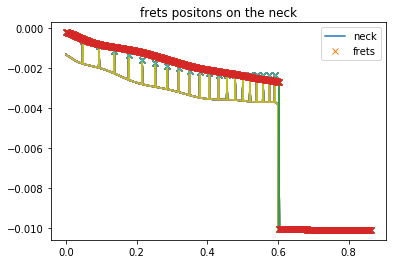

In [24]:
# Set path to matlab inputs
matlab_bass = './bass_guitar/pb2'
matlab_fretless = './fretless_bass_guitar/bsf'
results_path = remote_data['results_paths'][1]
for name in remote_data:
    campaign = remote_data[name]
    if name.find('bass') >= 0:
        for freq in campaign:
            restit = campaign[freq][3]
            file = os.path.join(results_path, campaign[freq][4])
            convfile = os.path.join(results_path, campaign[freq][5])
            if(not os.path.exists(convfile)):
                load_convert_and_save(file)
                
    elif name.find('fretless') >= 0:
        for freq in campaign:
            restit = campaign[freq][3]
            file = os.path.join(results_path, campaign[freq][4])
            convfile = os.path.join(results_path, campaign[freq][5])
            if(not os.path.exists(convfile)):
                load_convert_and_save(file)

In [ ]:
remote_data

In [ ]:
matlab_bass = './bass_guitar/pb2'
matlab_fretless = './fretless_bass_guitar/bsf'

load_convert_and_save('././Results_new_bass_0612/F_32768000_id_3882603/g_862_32768000.h5', matlab_bass, 1.)

In [ ]:
file = './Results_new_bass_0612/F_32768000_id_3882603/converted_g_862_32768000.h5'
h5file = h5py.File(file, 'r+')
print(h5file.attrs['restit'])
h5file.close()

In [ ]:
# Set path to matlab inputs
for name in remote_data:
    campaign = remote_data[name]
    if name.find('results_paths') < 0:
        for freq in campaign:
            restit = campaign[freq][3]
            file = os.path.join(results_path, campaign[freq][4])
            convfile = os.path.join(results_path, campaign[freq][5])   
            if os.path.exists(convfile):
                print(convfile)
                h5file = h5py.File(convfile, 'r+')
                h5file.attrs['restit'] = restit
                print(h5file.attrs['restit'])
                h5file.close()

In [ ]:
# Check frets output parameter 
for name in campaign_bass:
    filelist = campaign_bass[name]['files']
    for i in range(len(filelist)):
        
        if os.path.exists(filelist[i]):
            print(filelist[i])
            h5file = h5py.File(filelist[i], 'r+')
            h5file.attrs['frets output'] = 'light'
            print(h5file.attrs['frets output'])
            h5file.close()